# Final Notebook Pt 4.1: Just Maps

**By:** Andrew Williams and Ben Brassette
    
**Description:** Purpose of this notebook is to create general maps for the final. This is just for cosmetics. There is no expected analysis.  

**Expected Outputs**
* General Maps for the presentation.

# Importing Libraries and Datasets

Importing libraries for gpd, plotting, and basepamps.

In [1]:
import urllib.request, json 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import contextily as ctx

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


Import was successful.

# Master Dataset

Downloading master datase and running usual checks.`

In [2]:
master = gpd.read_file('master.geojson') 

In [3]:
type(master)

geopandas.geodataframe.GeoDataFrame

In [4]:
master.sample(3)

,geoid,name,Neighborho,Median Inc,Total Work,Car Total,Drove alon,Carpooled,Public tra,Bus,...,%From Ho_5,%From Ho_6,%From Ho_7,%From Ho_8,%From Ho_9,%From Ho10,%From Ho11,%From Ho12,%From Ho13,geometry
66,14000US06037109100,"Census Tract 1091, Los Angeles, CA",Mission Hills,67750.0,1120.0,1007.0,833.0,174.0,23.0,23.0,...,0.000000,0.000000,0.000000,0.000000,0.446429,0.446429,0.0,0.00000,0.0,"POLYGON ((-118.47204 34.26609, -118.47203 34.2..."
667,14000US06037220000,"Census Tract 2200, Los Angeles, CA",West Adams,42500.0,2296.0,1779.0,1621.0,158.0,266.0,207.0,...,0.000000,0.000000,0.000000,3.614983,1.437282,0.000000,0.0,0.65331,0.0,"POLYGON ((-118.34604 34.02758, -118.34604 34.0..."
293,14000US06037134904,"Census Tract 1349.04, Los Angeles, CA",Winnetka,49866.0,2286.0,1884.0,1621.0,263.0,230.0,207.0,...,1.049869,0.612423,0.306212,0.874891,0.087489,0.000000,0.0,0.00000,0.0,"POLYGON ((-118.58845 34.19524, -118.58795 34.1..."


In [5]:
master.columns= ['geoid',
 'name',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific Islander',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Pacific Islander',
 '%Hispanic or Latino',
 'Total Commute Pop',
 't_Less than 10 minutes',
 't_10 to 14 minutes',
 't_15 to 19 minutes',
 't_20 to 24 minutes',
 't_25 to 29 minutes',
 't_30 to 34 minutes',
 't_35 to 44 minutes',
 't_45 to 59 minutes',
 't_60 or more minutes',
 'Car, truck, or van',
 'c_Less than 10 minutes',
 'c_10 to 14 minutes',
 'c_15 to 19 minutes',
 'c_20 to 24 minutes',
 'c_25 to 29 minutes',
 'c_30 to 34 minutes',
 'c_35 to 44 minutes',
 'c_45 to 59 minutes',
 'c_60 or more minutes',
 'Drove alone_commmute',
 'da_Less than 10 minutes',
 'da_10 to 14 minutes',
 'da_15 to 19 minutes',
 'da_20 to 24 minutes',
 'da_25 to 29 minutes',
 'da_30 to 34 minutes',
 'da_35 to 44 minutes',
 'da_45 to 59 minutes',
 'da_60 or more minutes',
 'Carpooled_commmute',
 'cp_Less than 10 minutes',
 'cp_10 to 14 minutes',
 'cp_15 to 19 minutes',
 'cp_20 to 24 minutes',
 'cp_25 to 29 minutes',
 'cp_30 to 34 minutes',
 'cp_35 to 44 minutes',
 'cp_45 to 59 minutes',
 'cp_60 or more minutes',
 'Public transportation_commmute',
 'pt_Less than 10 minutes',
 'pt_10 to 14 minutes',
 'pt_15 to 19 minutes',
 'pt_20 to 24 minutes',
 'pt_25 to 29 minutes',
 'pt_30 to 34 minutes',
 'pt_35 to 44 minutes',
 'pt_45 to 59 minutes',
 'pt_60 or more minutes',
 'Bus_commmute',
 'b_Less than 10 minutes',
 'b_10 to 14 minutes',
 'b_15 to 19 minutes',
 'b_20 to 24 minutes',
 'b_25 to 29 minutes',
 'b_30 to 34 minutes',
 'b_35 to 44 minutes',
 'b_45 to 59 minutes',
 'b_60 or more minutes',
 'Subway_commmute',
 's_Less than 10 minutes',
 's_10 to 14 minutes',
 's_15 to 19 minutes',
 's_20 to 24 minutes',
 's_25 to 29 minutes',
 's_30 to 34 minutes',
 's_35 to 44 minutes',
 's_45 to 59 minutes',
 's_60 or more minutes',
 'Long-distance train_commmute',
 'ldt_Less than 10 minutes',
 'ldt_10 to 14 minutes',
 'ldt_15 to 19 minutes',
 'ldt_20 to 24 minutes',
 'ldt_25 to 29 minutes',
 'ldt_30 to 34 minutes',
 'ldt_35 to 44 minutes',
 'ldt_45 to 59 minutes',
 'ldt_60 or more minutes',
 'Walked_commmute',
 'w_Less than 10 minutes',
 'w_10 to 14 minutes',
 'w_15 to 19 minutes',
 'w_20 to 24 minutes',
 'w_25 to 29 minutes',
 'w_30 to 34 minutes',
 'w_35 to 44 minutes',
 'w_45 to 59 minutes',
 'w_60 or more minutes',
 'Percent t_Less than 10 minutes',
 'Percent t_15 to 19 minutes',
 'Percent t_20 to 24 minutes',
 'Percent t_25 to 29 minutes',
 'Percent t_30 to 34 minutes',
 'Percent t_35 to 44 minutes',
 'Percent t_45 to 59 minutes',
 'Percent t_60 or more minutes',
 'Percent c_Less than 10 minutes',
 'Percent c_15 to 19 minutes',
 'Percent c_20 to 24 minutes',
 'Percent c_25 to 29 minutes',
 'Percent c_30 to 34 minutes',
 'Percent c_35 to 44 minutes',
 'Percent c_45 to 59 minutes',
 'Percent c_60 or more minutes',
 'Percent pt_Less than 10 minutes',
 'Percent pt_15 to 19 minutes',
 'Percent pt_20 to 24 minutes',
 'Percent pt_25 to 29 minutes',
 'Percent pt_30 to 34 minutes',
 'Percent pt_35 to 44 minutes',
 'Percent pt_45 to 59 minutes',
 'Percent pt_60 or more minutes',
 'Total Pop Car Access',
 'Total No vehicle available',
 'Total 1 vehicle available',
 'Total 2 vehicles available',
 'Total 3 or more vehicles available',
 'Car Drove Alone_caccess',
 'CA No vehicle available',
 'CA 1 vehicle available',
 'CA 2 vehicles available',
 'CA 3 or more vehicles available',
 'Car Carpool_caccess',
 'CP No vehicle available',
 'CP 1 vehicle available',
 'CP 2 vehicles available',
 'CP 3 or more vehicles available',
 'Public transportation_caccess',
 'PT No vehicle available',
 'PT 1 vehicle available',
 'PT 2 vehicles available',
 'PT 3 or more vehicles available',
 'Worked from home_right_caccess',
 'WH No vehicle available',
 'WH 1 vehicle available',
 'WH 2 vehicles available',
 'WH 3 or more vehicles available',
 '%Total No vehicle available',
 '%Total 1 vehicle available',
 '%Total 2 vehicles available',
 '%Total 3 or more vehicles available',
 '%PT No vehicle available',
 '%PT 1 vehicle available',
 '%PT 2 vehicles available',
 '%PT 3 or more vehicles available',
 'Total',
 'Total Agriculture, forestry, fishing and hunting, and mining',
 'Total Construction',
 'Total Manufacturing',
 'Total Wholesale trade',
 'Total Retail trade',
 'Total Transportation and warehousing, and utilitie',
 'Total Information',
 'Total Finance and insurance, and real estate and rental and leasing',
 'Total Professional, scientific, and management, and administrative and waste management services',
 'Total Educational services, and health care and social assistance',
 'Total Arts, entertainment, and recreation, and accommodation and food services',
 'Total Other services (except public administration)',
 'Total Public administration',
 'Total Armed forces',
 'Car, truck, or van - drove alone_jobm2w',
 'Car(alone) Agriculture, forestry, fishing and hunting, and mining',
 'Car(alone) Construction',
 'Car(alone) Manufacturing',
 'Car(alone) Wholesale trade',
 'Car(alone) Retail trade',
 'Car(alone) Transportation and warehousing, and utilitie',
 'Car(alone) Information',
 'Car(alone) Finance and insurance, and real estate and rental and leasing',
 'Car(alone) Professional, scientific, and management, and administrative and waste management services',
 'Car(alone) Educational services, and health care and social assistance',
 'Car(alone) Arts, entertainment, and recreation, and accommodation and food services',
 'Car(alone) Other services (except public administration)',
 'Car(alone) Public administration',
 'Car(alone) Armed forces',
 'Car, truck, or van - carpooled',
 'Carpool Agriculture, forestry, fishing and hunting, and mining',
 'Carpool Construction',
 'Carpool Manufacturing',
 'Carpool Wholesale trade',
 'Carpool Retail trade',
 'Carpool Transportation and warehousing, and utilitie',
 'Carpool Information',
 'Carpool Finance and insurance, and real estate and rental and leasing',
 'Carpool Professional, scientific, and management, and administrative and waste management services',
 'Carpool Educational services, and health care and social assistance',
 'Carpool Arts, entertainment, and recreation, and accommodation and food services',
 'Carpool Other services (except public administration)',
 'Carpool Public administration',
 'Carpool Armed forces',
 'Public transportation_jobm2w',
 'PT Agriculture, forestry, fishing and hunting, and mining',
 'PT Construction',
 'PT Manufacturing',
 'PT Wholesale trade',
 'PT Retail trade',
 'PT Transportation and warehousing, and utilitie',
 'PT Information',
 'PT Finance and insurance, and real estate and rental and leasing',
 'PT Professional, scientific, and management, and administrative and waste management services',
 'PT Educational services, and health care and social assistance',
 'PT Arts, entertainment, and recreation, and accommodation and food services',
 'PT Other services (except public administration)',
 'PT Public administration',
 'PT Armed forces',
 'Worked from home_jobm2w',
 'From Home Agriculture, forestry, fishing and hunting, and mining',
 'From Home Construction',
 'From Home Manufacturing',
 'From Home Wholesale trade',
 'From Home Retail trade',
 'From Home Transportation and warehousing, and utilitie',
 'From Home Information',
 'From Home Finance and insurance, and real estate and rental and leasing',
 'From Home Professional, scientific, and management, and administrative and waste management services',
 'From Home Educational services, and health care and social assistance',
 'From Home Arts, entertainment, and recreation, and accommodation and food services',
 'From Home Other services (except public administration)',
 'From Home Public administration',
 'From Home Armed forces',
 '%Total Agriculture, forestry, fishing and hunting, and mining',
 '%Total Construction',
 '%Total Manufacturing',
 '%Total Wholesale trade',
 '%Total Retail trade',
 '%Total Transportation and warehousing, and utilitie',
 '%Total Information',
 '%Total Finance and insurance, and real estate and rental and leasing',
 '%Total Professional, scientific, and management, and administrative and waste management services',
 '%Total Educational services, and health care and social assistance',
 '%Total Arts, entertainment, and recreation, and accommodation and food services',
 '%Total Other services (except public administration)',
 '%Total Public administration',
 '%Total Armed forces',
 '%Car(alone) Agriculture, forestry, fishing and hunting, and mining',
 '%Car(alone) Construction',
 '%Car(alone) Manufacturing',
 '%Car(alone) Wholesale trade',
 '%Car(alone) Retail trade',
 '%Car(alone) Transportation and warehousing, and utilitie',
 '%Car(alone) Information',
 '%Car(alone) Finance and insurance, and real estate and rental and leasing',
 '%Car(alone) Professional, scientific, and management, and administrative and waste management services',
 '%Car(alone) Educational services, and health care and social assistance',
 '%Car(alone) Arts, entertainment, and recreation, and accommodation and food services',
 '%Car(alone) Other services (except public administration)',
 '%Car(alone) Public administration',
 '%Car(alone) Armed forces',
 '%PT Agriculture, forestry, fishing and hunting, and mining',
 '%PT Construction',
 '%PT Manufacturing',
 '%PT Wholesale trade',
 '%PT Retail trade',
 '%PT Transportation and warehousing, and utilitie',
 '%PT Information',
 '%PT Finance and insurance, and real estate and rental and leasing',
 '%PT Professional, scientific, and management, and administrative and waste management services',
 '%PT Educational services, and health care and social assistance',
 '%PT Arts, entertainment, and recreation, and accommodation and food services',
 '%PT Other services (except public administration)',
 '%PT Public administration',
 '%PT Armed forces',
 '%From Home Agriculture, forestry, fishing and hunting, and mining',
 '%From Home Construction',
 '%From Home Manufacturing',
 '%From Home Wholesale trade',
 '%From Home Retail trade',
 '%From Home Transportation and warehousing, and utilitie',
 '%From Home Information',
 '%From Home Finance and insurance, and real estate and rental and leasing',
 '%From Home Professional, scientific, and management, and administrative and waste management services',
 '%From Home Educational services, and health care and social assistance',
 '%From Home Arts, entertainment, and recreation, and accommodation and food services',
 '%From Home Other services (except public administration)',
 '%From Home Public administration',
 '%From Home Armed forces',
 'geometry',
]

In [6]:
master.sample(3)

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,"%From Home Transportation and warehousing, and utilitie",%From Home Information,"%From Home Finance and insurance, and real estate and rental and leasing","%From Home Professional, scientific, and management, and administrative and waste management services","%From Home Educational services, and health care and social assistance","%From Home Arts, entertainment, and recreation, and accommodation and food services",%From Home Other services (except public administration),%From Home Public administration,%From Home Armed forces,geometry
507,14000US06037203100,"Census Tract 2031, Los Angeles, CA",Boyle Heights,33179.0,1866.0,1604.0,1326.0,278.0,190.0,190.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.107181,0.0,0.0,"POLYGON ((-118.20288 34.05456, -118.20284 34.0..."
96,14000US06037113301,"Census Tract 1133.01, Los Angeles, CA",Northridge,66793.0,1460.0,1278.0,1162.0,116.0,52.0,40.0,...,0.0,0.000000,0.616438,2.123288,0.000000,0.958904,0.000000,0.0,0.0,"POLYGON ((-118.56452 34.24358, -118.56449 34.2..."
81,14000US06037111206,"Census Tract 1112.06, Los Angeles, CA",Porter Ranch,114275.0,2308.0,2099.0,1621.0,478.0,61.0,10.0,...,0.0,0.433276,0.000000,0.519931,1.256499,0.433276,0.000000,0.0,0.0,"POLYGON ((-118.54621 34.27382, -118.54609 34.2..."


# General Maps

Warm up maps to for overlays. I'm thinking of using some of these for the final. No analysis will be done on these maps.

Creating a dataset with just the neighborhoods in question. 

In [7]:
just_nbh = master[(master['Neighborhood']=='Downtown')|
                (master['Neighborhood']=='Pico-Union')|
                (master['Neighborhood']=='Mid-City')|
                (master['Neighborhood']=='Panorama City')|
                (master['Neighborhood']=='North Hollywood')]

In [8]:
just_nbh.to_file('neighborhoods_trimmed.geojson')

<ipython-input-8-86b8a3907540>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  just_nbh.to_file('neighborhoods_trimmed.geojson')


In [9]:
just_nbh.sample(4)

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,"%From Home Transportation and warehousing, and utilitie",%From Home Information,"%From Home Finance and insurance, and real estate and rental and leasing","%From Home Professional, scientific, and management, and administrative and waste management services","%From Home Educational services, and health care and social assistance","%From Home Arts, entertainment, and recreation, and accommodation and food services",%From Home Other services (except public administration),%From Home Public administration,%From Home Armed forces,geometry
176,14000US06037123206,"Census Tract 1232.06, Los Angeles, CA",North Hollywood,32266.0,1185.0,996.0,924.0,72.0,105.0,99.0,...,0.000000,0.000000,0.000000,1.687764,2.784810,0.000000,0.000000,0.000000,0.0,"POLYGON ((-118.37905 34.19219, -118.37905 34.1..."
188,14000US06037123901,"Census Tract 1239.01, Los Angeles, CA",North Hollywood,66771.0,2514.0,1914.0,1695.0,219.0,247.0,112.0,...,0.278441,0.477327,1.034208,1.034208,2.903739,1.233095,0.000000,0.000000,0.0,"POLYGON ((-118.40184 34.19031, -118.39979 34.1..."
139,14000US06037119900,"Census Tract 1199, Los Angeles, CA",Panorama City,78000.0,2684.0,2184.0,1863.0,321.0,189.0,181.0,...,0.856930,0.000000,0.000000,1.043219,2.347243,0.000000,0.596125,1.304024,0.0,"POLYGON ((-118.44807 34.23315, -118.44674 34.2..."
173,14000US06037123203,"Census Tract 1232.03, Los Angeles, CA",North Hollywood,48850.0,1680.0,1387.0,1338.0,49.0,168.0,98.0,...,0.000000,0.000000,0.000000,1.428571,0.000000,0.000000,0.000000,0.654762,0.0,"POLYGON ((-118.39651 34.20061, -118.39642 34.2..."


Definately borrowed this from Yoh

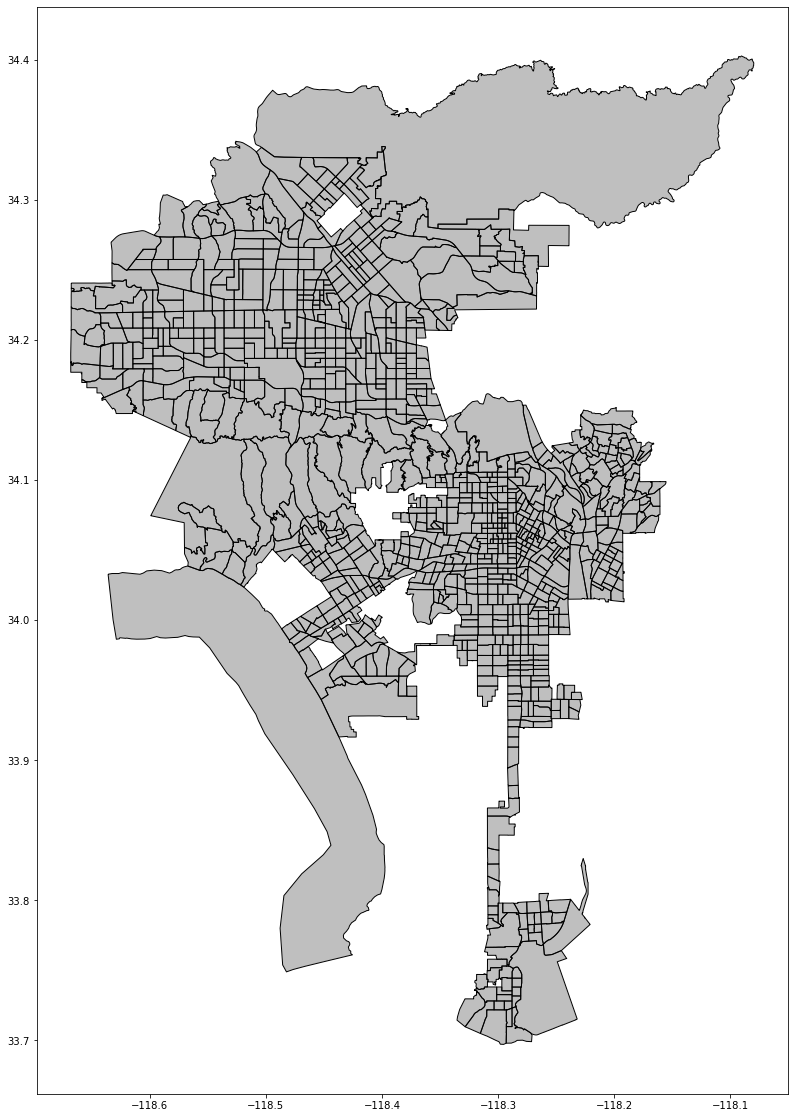

In [10]:
# compare
fig,ax = plt.subplots(figsize=(20,20))

# blue background of census tracts
master.plot(ax=ax,color='gray',zorder=10,alpha=0.5)

# black boundary of census tracts
master.boundary.plot(ax=ax,color='black',zorder=20,lw=1)

# while lines to show block groups (sandwiched between the two layers above for visual clarity)
master.boundary.plot(ax=ax,color='white',zorder=15,lw=0.5)

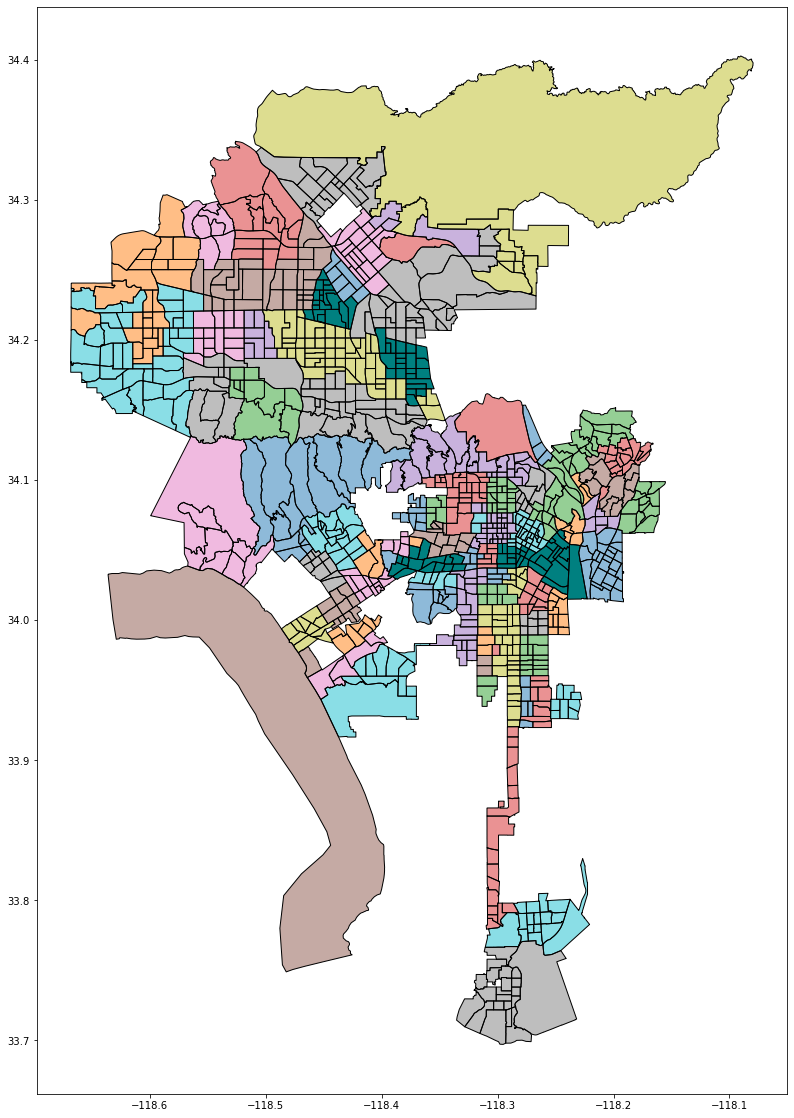

In [11]:
# compare
fig,ax = plt.subplots(figsize=(20,20))

# blue background of census tracts
master.plot(ax=ax, column= 'Neighborhood', cmap='tab10',zorder=10,alpha=0.5)

# black boundary of census tracts
master.boundary.plot(ax=ax,color='black',zorder=20,lw=1)

# while lines to show block groups (sandwiched between the two layers above for visual clarity)
just_nbh.plot(ax=ax,color='teal',zorder=15,lw=0.5)

In [12]:
master = master.to_crs(epsg=3857)

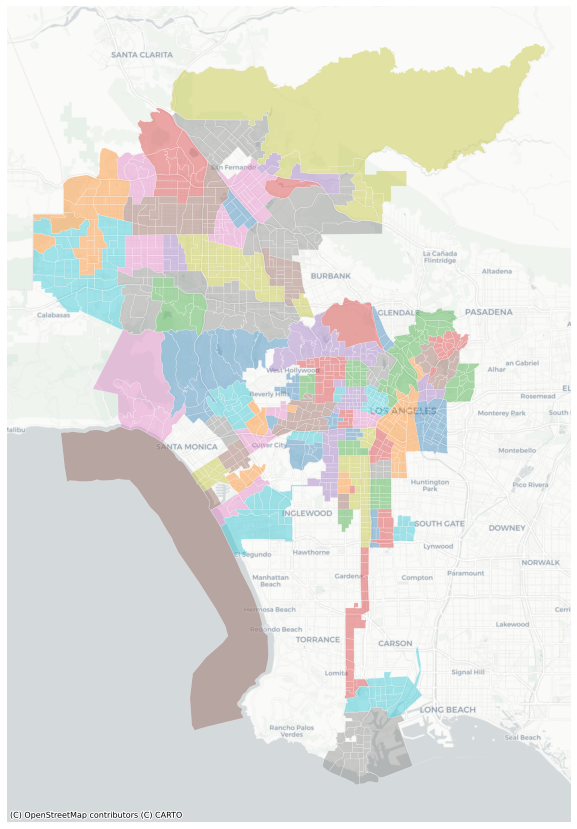

In [13]:
# plot it!
fig, ax = plt.subplots(figsize=(15,15))

master.plot(ax=ax,
         column="Neighborhood",
         cmap='tab10', 
         edgecolor='white',
         lw=0.5,
         alpha=0.4)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

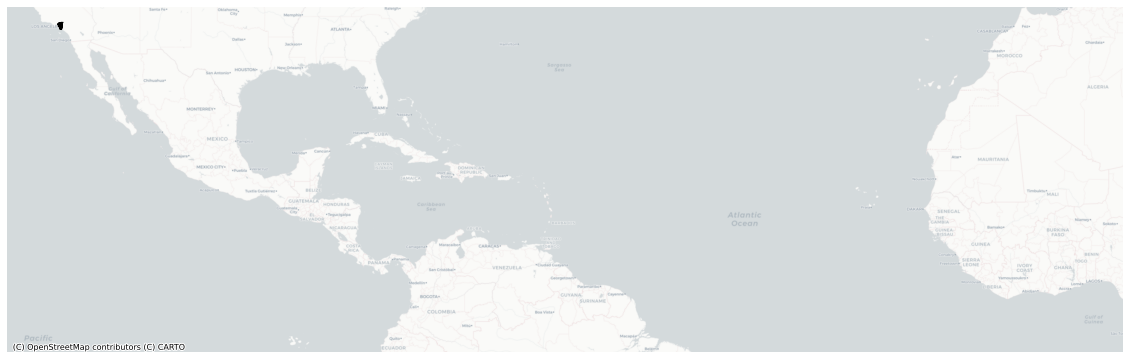

In [14]:
# compare
fig,ax = plt.subplots(figsize=(20,20))

# black boundary of census tracts
master.boundary.plot(ax=ax,color='black',zorder=20,lw=1)

# while lines to show block groups (sandwiched between the two layers above for visual clarity)
just_nbh.plot(ax=ax,column='Neighborhood', cmap='tab10', zorder=15,lw=0.5)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)